# Homework Assignment 1
---

For this homework you will need to write code that analyzes real-world datasets. The code needs to be written in Python using the [sqlite3](https://docs.python.org/2/library/sqlite3.html) package. 

**Please note:** You need to answer only the questions that match your ID first digit.




# 1. Babies Names Dataset (35pt)

**Task 1 (for everyone):** Write a code that uses the  [**babies names dataset**](https://catalog.data.gov/dataset/baby-names-from-social-security-card-applications-data-by-state-and-district-of-#topic=developers_navigation) and creates a table named (Names) with the dataset data and the following columns: 'State', 'Gender', 'Name', 'Number', and 'Year' (5pt)
**Bonus:** Load the data using a Batch INSERT SQL Query (2pt)

## (A) Download babies names dataset using Bash


In [0]:
# clean main folders
!rm -r *
!ls

# Creating a dataset directory. 
# -p Will also create any intermediate directories that don't exist
!mkdir -p ./datasets/us-baby-name/zip
!mkdir -p ./datasets/us-baby-name/data

# download the dataset from SSA and unzip it
!wget 'https://www.ssa.gov/oact/babynames/state/namesbystate.zip' -O "./datasets/us-baby-name/zip/namesbystate.zip"
!unzip {"./datasets/us-baby-name/zip/namesbystate.zip"} -d {"./datasets/us-baby-name/data"}

--2020-03-24 22:20:21--  https://www.ssa.gov/oact/babynames/state/namesbystate.zip
Resolving www.ssa.gov (www.ssa.gov)... 137.200.39.19, 2001:1930:d07::aaaa
Connecting to www.ssa.gov (www.ssa.gov)|137.200.39.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21974087 (21M) [application/zip]
Saving to: ‘./datasets/us-baby-name/zip/namesbystate.zip’

./datasets/us-baby- 100%[===================>]  20.96M   344KB/s    in 63s     

2020-03-24 22:21:26 (340 KB/s) - ‘./datasets/us-baby-name/zip/namesbystate.zip’ saved [21974087/21974087]

Archive:  ./datasets/us-baby-name/zip/namesbystate.zip
  inflating: ./datasets/us-baby-name/data/AK.TXT  
  inflating: ./datasets/us-baby-name/data/AL.TXT  
  inflating: ./datasets/us-baby-name/data/AR.TXT  
  inflating: ./datasets/us-baby-name/data/AZ.TXT  
  inflating: ./datasets/us-baby-name/data/CA.TXT  
  inflating: ./datasets/us-baby-name/data/CO.TXT  
  inflating: ./datasets/us-baby-name/data/CT.TXT  
  inflating: ./datasets

## (B) Test the Download and the Unzip

In [0]:
# only for test
!ls 'datasets/us-baby-name/data'

AK.TXT	CT.TXT	IA.TXT	LA.TXT	MO.TXT	NH.TXT	OK.TXT	StateReadMe.pdf  WA.TXT
AL.TXT	DC.TXT	ID.TXT	MA.TXT	MS.TXT	NJ.TXT	OR.TXT	TN.TXT		 WI.TXT
AR.TXT	DE.TXT	IL.TXT	MD.TXT	MT.TXT	NM.TXT	PA.TXT	TX.TXT		 WV.TXT
AZ.TXT	FL.TXT	IN.TXT	ME.TXT	NC.TXT	NV.TXT	RI.TXT	UT.TXT		 WY.TXT
CA.TXT	GA.TXT	KS.TXT	MI.TXT	ND.TXT	NY.TXT	SC.TXT	VA.TXT
CO.TXT	HI.TXT	KY.TXT	MN.TXT	NE.TXT	OH.TXT	SD.TXT	VT.TXT


## (C) Create dataframe using the TXT files

In [0]:
import glob
import pandas as pd

path = 'datasets/us-baby-name/data'
file_list = glob.glob(f'{path}/*.TXT')
all_name_df = None
for file_path in file_list:
  df_file = pd.read_csv(file_path, sep=",", header=None)
  df_file.columns = ['State', 'Gender',  'Year', 'Name', 'Number']
  if all_name_df is None:
    all_name_df = df_file
  else:
    all_name_df = all_name_df.append(df_file)
all_name_df = all_name_df[['State', 'Gender', 'Name', 'Number', 'Year']]  # reagrrange the columns
print(all_name_df.head(5))

  State Gender    Name  Number  Year
0    TX      F    Mary     895  1910
1    TX      F    Ruby     314  1910
2    TX      F   Annie     277  1910
3    TX      F  Willie     260  1910
4    TX      F    Ruth     252  1910


# (D) Create SQL DB using the Dataframe

In [0]:
!mkdir -p ./datasets/us-baby-name/sql
import sqlite3
DB_PATH_BABY = 'datasets/us-baby-name/sql/database.sqlite'
!rm -f ./datasets/us-baby-name/sql/database.sqlite
to_db = list(all_name_df.itertuples(index=False))
con = sqlite3.connect(DB_PATH_BABY)
cur = con.cursor()
# creates a table named (Names) with the dataset data and the following columns:
# 'State', 'Gender', 'Name', 'Number', and 'Year' (5pt)
cur.execute("CREATE TABLE babyName (State, Gender, Name, Number, Year);")

#  ***Bonus***: Load the data using a Batch INSERT SQL Query (2pt):
cur.executemany("INSERT INTO babyName (State, Gender, Name, Number, Year) VALUES (?, ?, ?, ?, ?);", to_db)
con.commit()
con.close()

# (E) Test the DB with all baby names

In [0]:
# only for test
!ls datasets/us-baby-name/sql/
conn = sqlite3.connect(DB_PATH_BABY) # connecting to the database
c = conn.cursor() # creating a cursor object
print("The number of names in the dataset: %s" % c.execute("SELECT count(*) FROM babyName" ).fetchone()) # execute a query & fetch the results
c.close() # close the cursor

database.sqlite
The number of names in the dataset: 6028151


**Task 2 (for everyone):** Write a query that returns the statistics for the name William (5pt). Use the [the timeit package](https://docs.python.org/3/library/timeit.html) to measure the time it takes the query to run (5pt). **Bonus:** [Create an index](https://www.w3schools.com/sql/sql_create_index.asp)  on the _Name_ column and use the [the timeit package](https://docs.python.org/3/library/timeit.html) to measure the time it takes the query to run with the index (5pt)

In [0]:
import timeit
import sqlite3
!ls datasets/us-baby-name/sql/
conn = sqlite3.connect(DB_PATH_BABY) # connecting to the database
c = conn.cursor() # creating a cursor object
#  Write a query that returns the statistics for the name William (5pt)
# Use the the timeit package to measure the time it takes the query to run (5pt).
query_for_stat = "SELECT Gender, sum(Number) FROM babyName WHERE Name == 'William' GROUP BY Gender"
print(f"The number of Female (F) and Male (M) named Williams in the dataset: {c.execute(query_for_stat).fetchall()}")
conn.commit()
conn.close() # close the cursor

# Use the the timeit package to measure the time it takes the query to run (5pt).
num_of_runs = 100
without_time = timeit.timeit(f'c.execute("{query_for_stat}").fetchone();', setup='import sqlite3; conn = sqlite3.connect(\'datasets/us-baby-name/sql/database.sqlite\'); c = conn.cursor();', number=num_of_runs)
print(f'Time to run query without indeices (average of {num_of_runs} runs): {without_time/num_of_runs:.5f}')

# ***Bonus***: Create an index on the Name column and use the the timeit package to measure the time it takes the query to run with the index (5pt)
conn = sqlite3.connect(DB_PATH_BABY) # connecting to the database
c = conn.cursor() # creating a cursor object
# c.execute("DROP INDEX name_idx;")
c.execute("CREATE INDEX name_idx ON babyName (Name)")
conn.commit()
conn.close() # close the cursor


# Use the the timeit package to measure the time it takes the query to run (5pt).
with_time = timeit.timeit(f'c.execute("{query_for_stat}").fetchone();', setup='import sqlite3; conn = sqlite3.connect(\'datasets/us-baby-name/sql/database.sqlite\'); c = conn.cursor();', number=num_of_runs)
print(f'Time to run query with indeices (average of {num_of_runs} runs): {with_time/num_of_runs:.5f}')

database.sqlite
The number of Female (F) and Male (M) named Williams in the dataset: [('F', 10211), ('M', 3890923)]
Time to run query without indeices (average of 100 runs): 0.41991
Time to run query with indeices (average of 100 runs): 0.01263


### <span style="color:red"> Please answer only **one** of the following questions according to your ID number (use the formula **<YOUR_ID> mod 4 +1**) </span>

In [0]:
# which question to answer - put your ID number and run the code 
your_id  = ""
q = int(your_id) % 4 + 1
print("You need to answer question number %s" % q)

You need to answer question number 3


***Question 1:*** Write a function that returns how many babies were born in a given state in a given year.
Use it to calculate the number of babies born in LA in 1950 (10pt)

***Question 2:*** Write a function that returns how many male babies were born between a given range of years.
Use it to calculate how many babies were born between 1970 and 1975  (10pt)

**Question 3:** Write a function that returns the most common female name in a given state. Use it to calculate the most common female name in Wasington in 1987 (10pt)

In [0]:
def get_common_female_name(state, year):
  conn = sqlite3.connect(DB_PATH_BABY) # connecting to the database
  c = conn.cursor() # creating a cursor object

  #  Write a query that returns the statistics for the name William (5pt)
  # Use the the timeit package to measure the time it takes the query to run (5pt).
  query_for_stat = f"SELECT Name, Number FROM babyName WHERE Gender == 'F' AND State == '{state}' AND Year == {year} GROUP BY Name ORDER BY Number desc;"
  female_num = c.execute(query_for_stat).fetchone()
  conn.commit()
  conn.close() # close the cursor
  return female_num

female_num = get_common_female_name('WA','1987')
print(f"The most common female name in Wasington in 1987:")
print(f"Name: {female_num[0]} | Frequent: {female_num[1]}")

The most common female name in Wasington in 1987:
Name: Jessica | Frequent: 884


**Question 4:** Write a function that returns how many male babies named _William_ where born in a given state in a given year. Use it to find the state in which the highest number of babies _William_ where born in 1999 (10pt)

**Question (for everyone):** For the state of NY write code that calculates the second most popular female/male names in each decade (10pt). **Bonus**: Visualize it somehow using Matplotlib (5pt)

In [0]:
def find_second_most_popular_in_decade(State, Gender):
  conn = sqlite3.connect(DB_PATH_BABY) # connecting to the database
  c = conn.cursor() # creating a cursor object
  #  Write a query that returns the statistics for the name William (5pt)
  # Use the the timeit package to measure the time it takes the query to run (5pt).
  new_table_query = f"SELECT Name, CAST(Year/10 AS int)*10 AS StartYear, CAST(Year/10 AS int)*10 + 9 AS EndYear, sum(Number) AS Total FROM babyName WHERE State == '{State}' AND Gender == '{Gender}' GROUP BY CAST(Year/10 AS int)*10, Name"
  new_table_query2 = f"SELECT Name, CAST(Year/10 AS int)*10 AS SY, CAST(Year/10 AS int)*10 + 9 AS EndYear, sum(Number) AS Total FROM babyName WHERE State == '{State}' AND Gender == '{Gender}' GROUP BY CAST(Year/10 AS int)*10, Name"
  query_for_stat = f"SELECT Name, StartYear, EndYear, Max(Total) FROM ({new_table_query}) WHERE Total < (SELECT maxT FROM (SELECT SY, MAX(Total) as maxT FROM ({new_table_query2}) WHERE StartYear == SY)) GROUP BY StartYear"
  list_to_return = c.execute(query_for_stat).fetchall()
  conn.commit()
  conn.close() # close the cursor
  return list_to_return

print("For the state of NY write, the second most popular female names in each decade")
female_ny = find_second_most_popular_in_decade('NY', 'F')
for decade in female_ny:
  print(f'Decade: [{decade[1]}-{decade[2]+1}) | Second most popular female names: {decade[0]} | Frequent: {decade[3]}')
print("For the state of NY write, the second most popular male names in each decade")
male_ny = find_second_most_popular_in_decade('NY', 'M')
for decade in male_ny:
  print(f'Decade: [{decade[1]}-{decade[2]+1}) | Second most popular female names: {decade[0]} | Frequent: {decade[3]}')

For the state of NY write, the second most popular female names in each decade
Decade: [1910-1920) | Second most popular female names: Helen | Frequent: 29923
Decade: [1920-1930) | Second most popular female names: Dorothy | Frequent: 31655
Decade: [1930-1940) | Second most popular female names: Joan | Frequent: 33005
Decade: [1940-1950) | Second most popular female names: Patricia | Frequent: 43340
Decade: [1950-1960) | Second most popular female names: Susan | Frequent: 47749
Decade: [1960-1970) | Second most popular female names: Mary | Frequent: 31467
Decade: [1970-1980) | Second most popular female names: Lisa | Frequent: 19555
Decade: [1980-1990) | Second most popular female names: Jessica | Frequent: 31551
Decade: [1990-2000) | Second most popular female names: Jessica | Frequent: 19645
Decade: [2000-2010) | Second most popular female names: Isabella | Frequent: 10749
Decade: [2010-2020) | Second most popular female names: Olivia | Frequent: 10846
For the state of NY write, the 

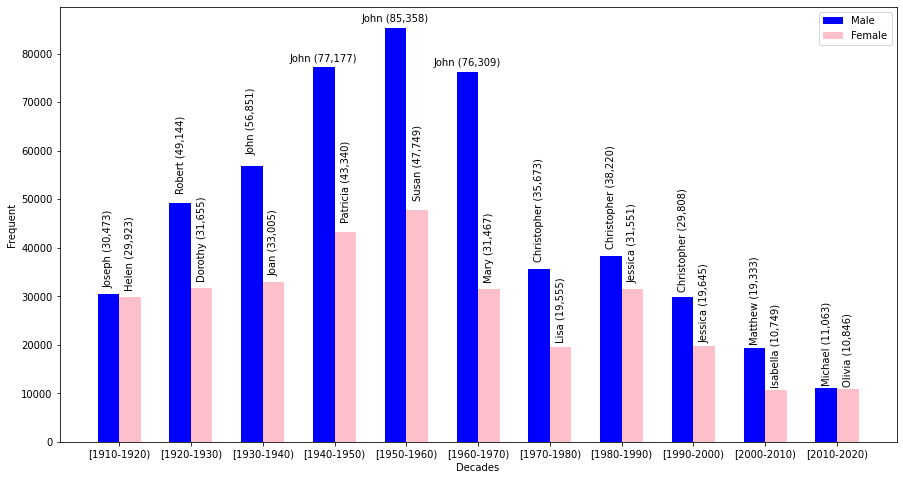

In [0]:
# Visualize it somehow using Matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

names_female = []
dates = []
values_female = []
for female_num_tuple in female_ny:
  name = female_num_tuple[0]
  names_female.append(name)
  start_time = female_num_tuple[1]
  end_time = female_num_tuple[2]
  dates.append(f'[{start_time}-{end_time+1})')
  count =  female_num_tuple[3]
  values_female.append(count)

names_male = []
dates = []
values_male = []
for male_num_tuple in male_ny:
  name = male_num_tuple[0]
  names_male.append(name)
  start_time = male_num_tuple[1]
  end_time = male_num_tuple[2]
  dates.append(f'[{start_time}-{end_time+1})')
  count =  male_num_tuple[3]
  values_male.append(count)

N = len(dates)
ind = np.arange(N)  # the x locations for the groups
width = 0.3       # the width of the bars

fig, ax = plt.subplots(figsize=(15, 8))

yvals = values_male
rects1 = ax.bar(ind, yvals, width, color='blue')
zvals = values_female
rects2 = ax.bar(ind+width, zvals, width, color='pink')

ax.set_ylabel('Frequent')
ax.set_xlabel('Decades')
ax.set_xticks(ind+(width/2))
ax.set_xticklabels( tuple(dates) )
ax.legend( (rects1[0], rects2[0]), ('Male', 'Female') )

def autolabel(rects, names):
    for i in range(len(rects)):
        rect = rects[i]
        name = names[i]
        h = rect.get_height()
        rotation = 90
        space = 1.04*h
        acutal_num = f'{int(h):,}'
        if int(h) > 70000:
          rotation = 0
          space = 1.01*h
        ax.text(rect.get_x()+rect.get_width()/2.,
                space,
                f'{name} ({acutal_num})',
                ha='center', va='bottom', rotation=rotation)
          

autolabel(rects1, names_male)
autolabel(rects2, names_female)

plt.show()

# 2. Flavors of Cacao Dataset (15pt)

Using the [Flavors of Cacao](https://www.kaggle.com/rombikuboktaeder/choco-flavors) dataset, answer the following questions:

## (A) Connect to Kaggle

In [0]:
!mkdir /root/.kaggle/
# Installing the Kaggle package
!pip install kaggle 

import json
import os
#TODO: REMOVE THIS LINE
#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
# api_token = {"username":"<Insert Your Kaggle User Name>","key":"<Insert Your Kaggle API key>"}

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

## (B) Search for the Choco dataset

In [0]:
# searching for the dataset
!rm -r ./datasets/choco_flavors/
!mkdir -p ./datasets/choco_flavors/data
!mkdir -p ./datasets/choco_flavors/zip
!ls datasets/choco_flavors/data

!kaggle datasets list -s choco_flavors

rm: cannot remove './datasets/choco_flavors/': No such file or directory
ref                             title          size  lastUpdated          downloadCount  
------------------------------  -------------  ----  -------------------  -------------  
rombikuboktaeder/choco-flavors  choco_flavors  30KB  2018-04-01 04:36:29            512  


## (C) Download choco_flavors using Kaggle

In [0]:
# download the dataset from Kaggle and unzip it
!kaggle datasets download rombikuboktaeder/choco-flavors -p ./datasets/choco_flavors/zip
!unzip ./datasets/choco_flavors/zip/*.zip -d ./datasets/choco_flavors/data
!ls ./datasets/choco_flavors/zip/
!ls ./datasets/choco_flavors/data/
!ls ./datasets/choco_flavors/sql/

  0% 0.00/30.3k [00:00<?, ?B/s]
100% 30.3k/30.3k [00:00<00:00, 58.5MB/s]
Archive:  ./datasets/choco_flavors/zip/choco-flavors.zip
  inflating: ./datasets/choco_flavors/data/flavors_of_cacao.csv  
choco-flavors.zip
flavors_of_cacao.csv
ls: cannot access './datasets/choco_flavors/sql/': No such file or directory


## (D) Convert CSV to SQLITE

In [0]:
!rm -r datasets/choco_flavors/sql/
!mkdir -p ./datasets/choco_flavors/sql
import pandas as pd
DATASET_PATH = 'datasets/choco_flavors/data/flavors_of_cacao.csv'
csv_data = pd.read_csv(DATASET_PATH)
csv_data.columns = ("Company", "Bean Origin", "REF", "Review Date", "Cocoa Percent", "Company Location", "Rating", "Bean Type", "Broad Bean Origin")
csv_data["Bean Type"].replace(r'^\s*$', np.nan, regex=True, inplace=True)
csv_data = csv_data.dropna()
print(csv_data.head(5))

import sqlite3
DB_PATH_choco = 'datasets/choco_flavors/sql/database.sqlite'
to_db = list(csv_data.itertuples(index=False))
con = sqlite3.connect(DB_PATH_choco)
cur = con.cursor()
# creates a table named (Names) with the dataset data and the following columns:
columns_str = '(Company, BeanOrigin, REF, ReviewDate, CocoaPercent, CompanyLocation, Rating, BeanType, BroadBeanOrigin)'
cur.execute(f'DROP TABLE IF EXISTS choco')
cur.execute(f"CREATE TABLE choco {columns_str};")
#  ***Bonus***: Load the data using a Batch INSERT SQL Query (2pt):
cur.executemany(f"INSERT INTO choco {columns_str} VALUES (?,?,?,?,?,?,?,?,?);", to_db)
con.commit()
con.close()
print('Done')

rm: cannot remove 'datasets/choco_flavors/sql/': No such file or directory
     Company     Bean Origin   REF  ...  Rating   Bean Type Broad Bean Origin
5   A. Morin        Carenero  1315  ...    2.75     Criollo         Venezuela
7   A. Morin    Sur del Lago  1315  ...    3.50     Criollo         Venezuela
8   A. Morin  Puerto Cabello  1319  ...    3.75     Criollo         Venezuela
11  A. Morin      Madagascar  1011  ...    3.00     Criollo        Madagascar
17  A. Morin           Chuao  1015  ...    4.00  Trinitario         Venezuela

[5 rows x 9 columns]
Done


**Question 1:** Write a function that returns the number of bars manufactured where the bars' BroadBean Origin is a given country. Use the function to calculate the number of bars where BroadBean Origin is 'Fiji' (15pt)

**Question 2:** Write a function that returns the maximal and average cocoa percentage in a bar manufactured by a company in a specific country. Use the function to calculate the maximal and average cocoa percentage in bars manufactured by a Swiss company (15pt).

**Question 3:** Calculate the second most common bean type(s) and the most rare bean type(s) (15
pt)

In [0]:
def second_most_common_bean_type():
  conn = sqlite3.connect(DB_PATH_choco) # connecting to the database
  c = conn.cursor() # creating a cursor object
  query_for_stat = f"SELECT BeanType, count(BeanType) AS frequent FROM (choco) GROUP BY BeanType ORDER BY frequent DESC LIMIT 1 OFFSET 1;"
  list_to_return = c.execute(query_for_stat).fetchall()
  max_value = list_to_return[0][1]
  query_for_stat = f"SELECT BeanType, Frequent FROM (SELECT BeanType, count(BeanType) as Frequent FROM (choco) GROUP BY BeanType) WHERE frequent == {max_value}"
  list_to_return = c.execute(query_for_stat).fetchall()
  conn.commit()
  conn.close() # close the cursor
  return list_to_return

def most_rare_bean_type():
  conn = sqlite3.connect(DB_PATH_choco) # connecting to the database
  c = conn.cursor() # creating a cursor object
  query_for_stat = f"SELECT BeanType, count(BeanType) AS frequent FROM (choco) GROUP BY BeanType ORDER BY frequent LIMIT 1;"
  list_to_return = c.execute(query_for_stat).fetchall()
  min_value = list_to_return[0][1]
  query_for_stat = f"SELECT BeanType, Frequent FROM (SELECT BeanType, count(BeanType) as Frequent FROM (choco) GROUP BY BeanType) WHERE frequent == {min_value}"
  list_to_return = c.execute(query_for_stat).fetchall()
  conn.commit()
  conn.close() # close the cursor
  return list_to_return

print("Please note: I removed rows with empty values")
delimiter = '-' * 10
print(f'{delimiter} Calculate the second most common bean type(s): {delimiter}')
second_most_common = second_most_common_bean_type()
for common_value_tuple in second_most_common:
  print(f'Name: {common_value_tuple[0]}, Fequent:{common_value_tuple[1]}')

print(f'{delimiter} Calculate the most rare bean type(s): {delimiter}')
rare = most_rare_bean_type()
for rare_tuple in rare:
  print(f'Name: {rare_tuple[0]}, Fequent:{rare_tuple[1]}')

Please note: I removed rows with empty values
---------- Calculate the second most common bean type(s): ----------
Name: Criollo, Fequent:153
---------- Calculate the most rare bean type(s): ----------
Name: Amazon, Fequent:1
Name: Blend-Forastero,Criollo, Fequent:1
Name: CCN51, Fequent:1
Name: Criollo (Ocumare 67), Fequent:1
Name: Criollo (Ocumare 77), Fequent:1
Name: Criollo (Ocumare), Fequent:1
Name: Criollo (Wild), Fequent:1
Name: Criollo, +, Fequent:1
Name: Forastero (Amelonado), Fequent:1
Name: Forastero (Arriba) ASSS, Fequent:1
Name: Forastero(Arriba, CCN), Fequent:1
Name: Forastero, Trinitario, Fequent:1
Name: Trinitario (Amelonado), Fequent:1
Name: Trinitario (Scavina), Fequent:1
Name: Trinitario, Nacional, Fequent:1
Name: Trinitario, TCGA, Fequent:1


**Question 4:** Calculate the number of reviews and the average rating in each year. Calculate the number of reviews and the average rating of each company in each year (15pt)

# 3. Kickstarter Projects Dataset (25pt)

Using the [Kickstarter Projects Dataset](https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv), answer the following questions:

In [0]:
# searching for the dataset
!rm -r ./datasets/kickstarter/
!mkdir -p ./datasets/kickstarter/data
!mkdir -p ./datasets/kickstarter/zip
!mkdir -p ./datasets/kickstarter/sql
!ls datasets/kickstarter/data

!kaggle datasets list -s kickstarter

rm: cannot remove './datasets/kickstarter/': No such file or directory
ref                                              title                                        size  lastUpdated          downloadCount  
-----------------------------------------------  ------------------------------------------  -----  -------------------  -------------  
kemical/kickstarter-projects                     Kickstarter Projects                         37MB  2018-02-08 09:02:30          35037  
socathie/kickstarter-project-statistics          Kickstarter Project Statistics                1MB  2019-11-14 06:38:31           5336  
codename007/funding-successful-projects          Funding Successful Projects on Kickstarter   20MB  2017-06-20 17:37:38           2419  
yashkantharia/kickstarter-campaigns              Kickstarter Campaigns                        12MB  2019-03-03 13:46:08            442  
oscarvilla/kickstarter-nlp                       kickstarter NLP                              11MB  2018-08

In [0]:
# download the dataset from Kaggle and unzip it
!kaggle datasets download kemical/kickstarter-projects -p ./datasets/kickstarter/zip
!unzip ./datasets/kickstarter/zip/*.zip -d ./datasets/kickstarter/data
!ls ./datasets/kickstarter/zip/
!ls ./datasets/kickstarter/data/
!ls ./datasets/kickstarter/sql/

 46% 17.0M/36.8M [00:00<00:00, 106MB/s]
100% 36.8M/36.8M [00:00<00:00, 146MB/s]
Archive:  ./datasets/kickstarter/zip/kickstarter-projects.zip
  inflating: ./datasets/kickstarter/data/ks-projects-201612.csv  
  inflating: ./datasets/kickstarter/data/ks-projects-201801.csv  
kickstarter-projects.zip
ks-projects-201612.csv	ks-projects-201801.csv


In [0]:
import pandas as pd  # create dataframe only from one file
df = pd.read_csv('./datasets/kickstarter/data/ks-projects-201801.csv')
df.fillna(0)
print(df.head(5))

           ID  ... usd_goal_real
0  1000002330  ...       1533.95
1  1000003930  ...      30000.00
2  1000004038  ...      45000.00
3  1000007540  ...       5000.00
4  1000011046  ...      19500.00

[5 rows x 15 columns]


**Task 1 (for everyone):** Load the dataset to SQLite DB using [PonyORM](https://ponyorm.org) (10pt)

In [0]:
!pip install pony
from pony.orm import *
# Creating a new database
!rm -f /content/datasets/kickstarter/sql/kickstarter.pony.db
!ls /content/datasets/kickstarter/sql/
db = Database()
db.bind(provider='sqlite', filename='/content/datasets/kickstarter/sql/kickstarter.pony.db', create_db=True) # notice we can easily use other type of databases instead of SQLite

class Category(db.Entity):
    cat_name = Required(str)
    projects = Set('Project')

class Project(db.Entity):
    proj_id = Required(int)
    proj_name = Required(str)
    backers = Required(int)
    category = Required('Category')

     |████████████████████████████████| 286kB 2.7MB/s 
  Created wheel for pony: filename=pony-0.7.13-cp36-none-any.whl size=345363 sha256=e8d4f308c18a952e0ac3883a808cfe0fb498976169afd394a9a7e71f077fb608
  Stored in directory: /root/.cache/pip/wheels/ca/c7/66/a9192d0ea4bcb17a25164284ec89b4563a6afbf7333947c0ea
Successfully built pony


In [0]:
show(Project)
show(Category)

class Project(Entity):
    id = PrimaryKey(int, auto=True)
    proj_id = Required(int)
    proj_name = Required(str)
    backers = Required(int)
    category = Required(Category)
class Category(Entity):
    id = PrimaryKey(int, auto=True)
    cat_name = Required(str)
    projects = Set(Project)


In [0]:
set_sql_debug(True) # helps to see what SQL commands are running
db.generate_mapping(create_tables=True) # create tables

GET CONNECTION FROM THE LOCAL POOL
PRAGMA foreign_keys = false
BEGIN IMMEDIATE TRANSACTION
CREATE TABLE "Category" (
  "id" INTEGER PRIMARY KEY AUTOINCREMENT,
  "cat_name" TEXT NOT NULL
)

CREATE TABLE "Project" (
  "id" INTEGER PRIMARY KEY AUTOINCREMENT,
  "proj_id" INTEGER NOT NULL,
  "proj_name" TEXT NOT NULL,
  "backers" INTEGER NOT NULL,
  "category" INTEGER NOT NULL REFERENCES "Category" ("id") ON DELETE CASCADE
)

CREATE INDEX "idx_project__category" ON "Project" ("category")

SELECT "Category"."id", "Category"."cat_name"
FROM "Category" "Category"
WHERE 0 = 1

SELECT "Project"."id", "Project"."proj_id", "Project"."proj_name", "Project"."backers", "Project"."category"
FROM "Project" "Project"
WHERE 0 = 1

COMMIT
PRAGMA foreign_keys = true
CLOSE CONNECTION


In [0]:
cat_dict = {}
for idx, row in df.iterrows():
    cat_name = row['category']
    cat = None
    if cat_name in cat_dict:
      cat = cat_dict[cat_name]
    else:
      cat = Category(cat_name=cat_name)
      cat_dict[cat_name] = cat
    Project(proj_id=row['ID'], proj_name=str(row['name']), backers=row['backers'], category=cat)
commit()

Streaming output truncated to the last 5000 lines.
INSERT INTO "Project" ("proj_id", "proj_name", "backers", "category") VALUES (?, ?, ?, ?)
[991514454, "Spy in the Teachers' Lounge - Illustrated Young Adult Novel", 8, 64]

INSERT INTO "Project" ("proj_id", "proj_name", "backers", "category") VALUES (?, ?, ?, ?)
[991514477, 'Double Barrel Theatre Presents 2015', 1, 110]

INSERT INTO "Project" ("proj_id", "proj_name", "backers", "category") VALUES (?, ?, ?, ?)
[991518351, 'The Hunter (Short Horror Film)', 22, 98]

INSERT INTO "Project" ("proj_id", "proj_name", "backers", "category") VALUES (?, ?, ?, ?)
[99152158, 'BRING CRAFT DISTILLING TO THE BIG THICKET!', 6, 6]

INSERT INTO "Project" ("proj_id", "proj_name", "backers", "category") VALUES (?, ?, ?, ?)
[991534158, 'Amy Fairchild is making a new record. Join in the fun!', 278, 35]

INSERT INTO "Project" ("proj_id", "proj_name", "backers", "category") VALUES (?, ?, ?, ?)
[991540533, 'MAYDAK VOLUME 2', 114, 17]

INSERT INTO "Project" ("pr

### <span style="color:red"> Please answer only **one** of the following questions according to your ID number (use the formula **<YOUR_ID> mod 3 +1**) </span>

In [0]:
# which question to answer - put your ID number and run the code 
your_id  = ""
q = int(your_id) % 3 + 1
print("You need to answer question number %s" % q)

You need to answer question number 1


**Question 1:** On average which project category received the highest number of backers? (15 pt)

In [0]:
import statistics
import operator
dict_cat = {}
for c in Category.select():
  list_of_backerts = list(c.projects.backers)
  dict_cat[c.cat_name] = statistics.mean(list_of_backerts)
rel_key = max(dict_cat.items(), key=operator.itemgetter(1))[0]
print(f'Category: {rel_key}, Number of Backers: {dict_cat[rel_key]}')

BEGIN IMMEDIATE TRANSACTION
SELECT "c"."id", "c"."cat_name"
FROM "Category" "c"

Category: Chiptune, Number of Backers: 443.9428571428571


[**Question 2:** On average which project category received the highest pledged USD? (15 pt)

**Question 3:** In which month occurred the highest number of projects? (15 pt)

## 4. Oscars Datasets (10pt)

Using the [Oscars Dataset](https://www.kaggle.com/theacademy/academy-awards), please answer only one of the following questions (you can chose):

In [0]:
# searching for the dataset
!rm -r ./datasets/academy-awards/
!mkdir -p ./datasets/academy-awards/data
!mkdir -p ./datasets/academy-awards/zip
!mkdir -p ./datasets/academy-awards/sql
!ls datasets/academy-awards/data

!kaggle datasets list -s academy-awards

rm: cannot remove './datasets/academy-awards/': No such file or directory
ref                                                     title                                                size  lastUpdated          downloadCount  
------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
theacademy/academy-awards                               The Academy Awards, 1927-2015                       185KB  2017-02-13 17:30:48           4866  
fmejia21/demographics-of-academy-awards-oscars-winners  Demographics of Academy Awards (Oscars) Winners      20KB  2020-02-04 17:38:26           2132  
unanimad/golden-globe-awards                            Golden Globe Awards, 1944 - 2020                    117KB  2020-01-06 16:19:01           1550  
unanimad/the-oscar-award                                The Oscar Award, 1927 - 2020                        191KB  2020-02-19 15:45:30            552  
madhurinani/os

In [0]:
# download the dataset from Kaggle and unzip it
!kaggle datasets download theacademy/academy-awards  -p ./datasets/academy-awards/zip
!unzip ./datasets/academy-awards/zip/*.zip -d ./datasets/academy-awards/data
!ls ./datasets/academy-awards/zip/
!ls ./datasets/academy-awards/data/
!ls ./datasets/academy-awards/sql/

  0% 0.00/185k [00:00<?, ?B/s]
100% 185k/185k [00:00<00:00, 71.9MB/s]
Archive:  ./datasets/academy-awards/zip/academy-awards.zip
  inflating: ./datasets/academy-awards/data/database.csv  
academy-awards.zip
database.csv


In [0]:
import pandas as pd
DATASET_PATH = 'datasets/academy-awards/data/database.csv'
csv_data = pd.read_csv(DATASET_PATH)
print(csv_data.head(5))

        Year  Ceremony    Award  Winner                 Name              Film
0  1927/1928         1    Actor     NaN  Richard Barthelmess         The Noose
1  1927/1928         1    Actor     1.0        Emil Jannings  The Last Command
2  1927/1928         1  Actress     NaN       Louise Dresser   A Ship Comes In
3  1927/1928         1  Actress     1.0         Janet Gaynor        7th Heaven
4  1927/1928         1  Actress     NaN       Gloria Swanson    Sadie Thompson


In [0]:
import sqlite3
DB_PATH_academy = 'datasets/academy-awards/sql/database.sqlite'
!rm -f ./datasets/academy-awards/sql/database.sqlite
to_db = list(csv_data.itertuples(index=False))
con = sqlite3.connect(DB_PATH_academy)
cur = con.cursor()
# creates a table named (Names) with the dataset data and the following columns:
columns_str = '(Year, Ceremony, Award, Winner, Name, Film)'
cur.execute(f"CREATE TABLE award {columns_str};")
#  ***Bonus***: Load the data using a Batch INSERT SQL Query (2pt):
cur.executemany(f"INSERT INTO award {columns_str} VALUES (?,?,?,?,?,?);", to_db)
con.commit()
con.close()

**Question 1:** Who is the female actress with the most Oscar nominees? (10pt)

In [0]:
  conn = sqlite3.connect(DB_PATH_academy) # connecting to the database
  c = conn.cursor() # creating a cursor object

  #  Write a query that returns the statistics for the name William (5pt)
  # Use the the timeit package to measure the time it takes the query to run (5pt).
  print("Please Note! It's not clear if you meant to the specific female actress or actress in general. I've attached both answers below.")
  query_for_stat = f"SELECT Name, count(*) FROM award WHERE Award == 'Actress' GROUP BY Name ORDER BY count(Name) DESC LIMIT 1"
  female_num = c.execute(query_for_stat).fetchall()
  print(f'FACT 1: *{female_num[0][0]}* is the female actress with the most Oscar nominees (*{female_num[0][1]}* nominees)')
  query_for_stat = f"SELECT Name, count(*) FROM award WHERE Award LIKE 'Actress%' GROUP BY Name ORDER BY count(Name) DESC LIMIT 1"
  female_num = c.execute(query_for_stat).fetchall()
  print(f'FACT 2: *{female_num[0][0]}* is the female actress (including actress supporting or actress leading role) with the most Oscar nominees (*{female_num[0][1]}* nominees)')
  conn.commit()
  conn.close() # close the cursor
  

Please Note! It's not clear if you meant to the specific female actress or actress in general. I've attached both answers below.
FACT 1: *Bette Davis* is the female actress with the most Oscar nominees (*11* nominees)
FACT 2: *Meryl Streep* is the female actress (including actress supporting or actress leading role) with the most Oscar nominees (*19* nominees)


**Question 2:** Who is the male director with the most Oscar nominees? (10pt)

**Question 3:** Which top-10 movies received the highest number of Oscar nominees? (10pt)

**Question 4:** Write a function that receives an actor's name and returns the actor’s number of Oscar nominees. Use the function to calculate the number of times Leonardo DiCaprio was a nominee (10pt)

## 5. Select a Dataset (15pt)

**Open Question:** Select an interesting dataset and use SQL to discover something interesting (15pt). **Bonus:** Use BigQuery (2pt)

In [0]:
# searching for the dataset
!rm -r ./datasets/spotify/
!mkdir -p ./datasets/spotify/data
!mkdir -p ./datasets/spotify/zip
!mkdir -p ./datasets/spotify/sql
!ls datasets/spotify/data

!kaggle datasets list -s spotify

rm: cannot remove './datasets/spotify/': No such file or directory
ref                                                   title                                            size  lastUpdated          downloadCount  
----------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  
leonardopena/top50spotify2019                         Top 50 Spotify Songs - 2019                       2KB  2019-08-08 16:39:46          12463  
geomack/spotifyclassification                         Spotify Song Attributes                          98KB  2017-08-04 21:05:17           9184  
nadintamer/top-spotify-tracks-of-2018                 Top Spotify Tracks of 2018                        7KB  2019-02-07 06:04:33           9152  
nadintamer/top-tracks-of-2017                         Top Spotify Tracks of 2017                        7KB  2017-12-20 06:04:48           7643  
zaheenhamidani/ultimate-spotify-tracks-db             Spo

In [0]:
# download the dataset from Kaggle and unzip it
!kaggle datasets download zaheenhamidani/ultimate-spotify-tracks-db  -p ./datasets/spotify/zip
!unzip ./datasets/spotify/zip/*.zip -d ./datasets/spotify/data
!ls ./datasets/spotify/zip/
!ls ./datasets/spotify/data/
!ls ./datasets/spotify/sql/

 32% 5.00M/15.5M [00:00<00:01, 10.4MB/s]
100% 15.5M/15.5M [00:00<00:00, 26.4MB/s]
Archive:  ./datasets/spotify/zip/ultimate-spotify-tracks-db.zip
  inflating: ./datasets/spotify/data/SpotifyFeatures.csv  
ultimate-spotify-tracks-db.zip
SpotifyFeatures.csv


In [0]:
import pandas as pd
DATASET_PATH_SPOTIFY = 'datasets/spotify/data/SpotifyFeatures.csv'
csv_data = pd.read_csv(DATASET_PATH_SPOTIFY)
print(csv_data.head(5))

   genre        artist_name  ... time_signature valence
0  Movie     Henri Salvador  ...            4/4   0.814
1  Movie  Martin & les fées  ...            4/4   0.816
2  Movie    Joseph Williams  ...            5/4   0.368
3  Movie     Henri Salvador  ...            4/4   0.227
4  Movie       Fabien Nataf  ...            4/4   0.390

[5 rows x 18 columns]


In [0]:
import sqlite3
DB_PATH_SPOTIFY = 'datasets/spotify/sql/database.sqlite'
!rm -r ./datasets/spotify/sql/database.sqlite
to_db = list(csv_data.itertuples(index=False))
con = sqlite3.connect(DB_PATH_SPOTIFY)
cur = con.cursor()
# creates a table named (Names) with the dataset data and the following columns:
columns_str = '(genre, artist_name, track_name, track_id, popularity, acousticness, danceability, duration_ms, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, time_signature, valence)'
cur.execute(f'DROP TABLE IF EXISTS spotify')
cur.execute(f"CREATE TABLE spotify {columns_str};")
#  ***Bonus***: Load the data using a Batch INSERT SQL Query (2pt):
cur.executemany(f"INSERT INTO spotify {columns_str} VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?);", to_db)
con.commit()
con.close()

rm: cannot remove './datasets/spotify/sql/database.sqlite': No such file or directory


# TOP FIVE artists with the most average of ______ songs from Spotify
Dataset from Kaggle: [Spotify Tracks DB](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db)

There are 26 genres and a total of 232,725 tracks.

This is the explanation of every measure: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

***For example:***

**Danceability** describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

In [0]:
from google.cloud import bigquery
import os
!mkdir /root/.bigquery/

def find_mean_feature(num, feature_name):
  conn = sqlite3.connect(DB_PATH_SPOTIFY) # connecting to the database
  c = conn.cursor() # creating a cursor object

  #  Write a query that returns the statistics for the name William (5pt)
  # Use the the timeit package to measure the time it takes the query to run (5pt).
  query_for_stat = f"SELECT artist_name, AVG({feature_name}) FROM spotify GROUP BY artist_name ORDER BY AVG({feature_name}) DESC LIMIT {num}"
  female_num = c.execute(query_for_stat).fetchall()
  print(f'----- Top {num} artists with highest average of {feature_name} songs -----')
  for art_num, artist in enumerate(female_num):
    print(f'{art_num+1}. Artist: {artist[0]} | Average {feature_name}: {artist[1]}')
  print()
  conn.commit()
  conn.close() # close the cursor

find_mean_feature(num=5, feature_name='popularity')
find_mean_feature(num=5, feature_name='energy')
find_mean_feature(num=5, feature_name='danceability')
find_mean_feature(num=5, feature_name='acousticness')
find_mean_feature(num=5, feature_name='duration_ms')
find_mean_feature(num=5, feature_name='instrumentalness')
find_mean_feature(num=5, feature_name='liveness')
find_mean_feature(num=5, feature_name='loudness')
find_mean_feature(num=5, feature_name='speechiness')

----- Top 5 artists with highest average of popularity songs -----
1. Artist: Pedro Capó | Average popularity: 87.0
2. Artist: Mario Bautista | Average popularity: 85.0
3. Artist: Mau y Ricky | Average popularity: 83.0
4. Artist: Kris Kross Amsterdam | Average popularity: 82.0
5. Artist: Ninho | Average popularity: 82.0

----- Top 5 artists with highest average of energy songs -----
1. Artist: Caramell | Average energy: 0.9990000000000001
2. Artist: Culture Beat | Average energy: 0.997
3. Artist: Flat Duo Jets | Average energy: 0.997
4. Artist: Like Moths To Flames | Average energy: 0.997
5. Artist: Vektor | Average energy: 0.995

----- Top 5 artists with highest average of danceability songs -----
1. Artist: Vanilla Ice | Average danceability: 0.978
2. Artist: Mr. Symarip | Average danceability: 0.976
3. Artist: [dunkelbunt] | Average danceability: 0.9750000000000001
4. Artist: Bankroll Fresh | Average danceability: 0.9690000000000001
5. Artist: Biboulakis | Average danceability: 0.96